# Monte Carlo Methods

Partly based on material of Elizaveta Semenova, Applied Machine Learning Days 2020, Bayesian Inference: embracing uncertainty.

## What are Monte Carlo Methods?

Monte Carlo Methods are a class of algorithms that infer quantities by using random number generators.

Monte Carlo Methods are probabilistic and not deterministic. This is, Monte Carlo Methods usually don't yield the same excat results when being repeating. They are statistical methods, which estimate quantities - or parameters - rather than determining them.

In this Notebook, two examples of Monte Carlo Methods are discussed

 * Monte Carlo Integration
   * $\int_{0}^{1}e^{x}dx$
 * Parameter Estimation with Bayesian Inference
   * Coin Toss - Estimating Head's Probability
     * Analytically
     * Metropollis-Hastings Random Walk Algorithm
       * Manually
       * PyMC
   * Normal Distribution
   * Linear Regression
   * Binomial Likelihood
   * Probabilistical Graphical Models
 


## Monte Carlo Integration
 
Monte Carlo Integration is one form of Numerical Integration. Numerical Integration calculates integrals $$ \int_{a}^{b}f(x)dx$$ of Riemann-integrable functions computationally instead of determining them analytically. This is useful because finding closed-form solutions for integrals is often difficult. Numerical Integration generally computes integrals by approximating the function, which is to be integrated, by a step function. Monte Carlo Integration, on the other hand, estimates this integral by estimating the fraction of random points that fall below $f(x)$. Monte Carlo Integration scales better to integration in high-dimensional spaces compared to Numerical Integration that is based on a step function aproach, which suffers heavily from the curse of dimensionality.


### Example

Determine the integral $\int_0^1 e^x dx$.

Analytically, this can be calculated by $e^1 - e^0 = e - 1$ 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as mc

In [3]:
# Calculate Integral Analytically
np.exp(1) - np.exp(0)

1.718281828459045

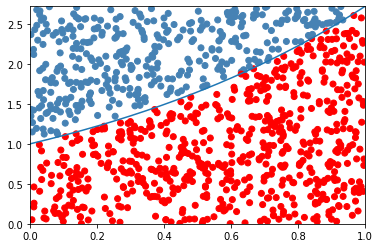

In [4]:
# Monte Carlo Integration - Visualization

no_points = 1000

x = np.linspace(0, 1, no_points)
plt.plot(x, np.exp(x));
pts = np.random.uniform(0,1,(no_points, 2))
pts[:, 1] *= np.e

cols = ['red'] * no_points
for i in range(no_points):
    if pts[i,1] > np.exp(pts[i,0]):     # acceptance / rejection step
        cols[i] = 'steelblue'
    
plt.scatter(pts[:, 0], pts[:, 1], c = cols)
plt.xlim([0,1])
plt.ylim([0, np.e]);

In [5]:
# Monte Carlo Integration - Estimation

for n in 10**np.array([1,2,3,4,5,6,7]):
    pts = np.random.uniform(0, 1, (n, 2))
    pts[:, 1] *= np.e
    count = np.sum(pts[:, 1] < np.exp(pts[:, 0]))
    volume = np.e * 1 # volume of region
    sol = (volume * count)/n    
    print(f'{n} {sol}')

10 1.3591409142295225
100 1.875614461636741
1000 1.7206723974145754
10000 1.7103429264664312
100000 1.7167580715815944
1000000 1.7173615301475125
10000000 1.7183664789394937


## Monte Carlo Parameter Estimation in Statistical Inference

In this second use case of Monte Carlo Methods, we we want to use Monte Carlo Methos to do staticial inference. In statistical inference we use data to infer properties of an underlying probability distribution. Or in other words, to estimate the parameters $\theta \in \Theta$ of a statistical model.

### Statistical Inference

Statistical inference is a concept which is independent of Monte Carlo Methods. Monte Carlo Methods are rather one way to do statistical inference. Statistical inference can also be done by determining estimates of parameters of interest analytically, e.g. by pencil and paper. Determining parameter estimates analytically, however, can be difficult or impracticable because of complicated probability distributions or non-differentiability of probability of likelihood function wrt to the parameters of interest. In those cases, Monte Carlo Method offer an alternative to infer properties of an underlying propability distribution by using random sampling.

Statistical inference can be done using different approaches. Most common are the frequentist approach and the Bayesian approach. These two approaches differ in how they use probability to express uncertainty in their respective statistical models. 

#### Frequentist Approach

In the frequentist's approach to probability the parameters of a statistical model are fixed. We assume that there is only one "true" parameter combination that characterizes the underlying probability distribution. Our task is to find it. We estimate the "true" parameter combination by finding that parameter combination that explains the data with the highest possible likelihood. Finding and calculating this "most plausible" parameter combination is known as Maximum Likelihood Estimation (MLE). For MLE, we use only current data and no explicit prior belief about the parameters. In the frequentist's sense, probability is interpreted as the **frequency** of events.   


#### Bayesian Approach

In the Bayesian approach, on the other hand, probability represents **one's uncertainty**. We don't assume that the parameters describing underlying probability distributions are fixed. We rather assume that these parameters are non-deterministic - or at least that they present themselfes to us observers as non-deterministic. In this sense, we usually not only derive and calculate point estimates of parameters of interest but we rather infer whole probability distributions over those parameters describing and quantifying the uncertainty we associate with that parameters. Calculating those probability distributions, however, is generally more complicated than calculating point estimates in the MLE setting. This is, because for calculating probability distributions over paramters we need Bayes rule. 

Bayes rule follows from the definition of conditional probability

$$ P(A | B) = \frac{P(A, B)}{P(B)}$$

$$ P(B | A) = \frac{P(A, B)}{P(A)}$$

And rearanging

$$ P(A | B) = \frac{P(B | A) P(A)}{P(B)}$$

where $A \in 𝒜$, $B \in ℬ$ and $𝒜 \times	ℬ$ is the product of measurable spaces 𝒜 and ℬ. The same relationship is also true for probability density functions, i.e. 


$$ p(x | y) = \frac{p(y | x) p(x)}{p(y)}$$

In Bayesian approach to probability we usually have a random sample $x = x_{i=1,...,n}$ drawn from a random variable $X_{\theta}$ whose underlying probability distribution is parametrized by $\theta \in \Theta$. In Bayesian statistics, in contrast to the frequentist's approach to probability, we assume a probability distribution over $\Theta$ as well. In practise, we usually want to find a point estimate $\hat{\theta}$ for the unknown model parameter and its distribution given the data $x = x_{i=1,...,n}$. We can calculate that distribution using Bayes' rule as follows

$$p(\theta | x) =  \frac{p(x | \theta) p(\theta)}{p(x)}$$

The right-hand side of this equation consists of three terms. 

 * $p(x | \theta)$ represents the probability of the data under the model $\theta$. It has a similar form as the likelihood function in the frequentist's MLE setting $p(x; \theta)$ and is thus called **likelihood**
 * $p(x)$ is the probability of observing the data $x$ and is called the **data** term
 * $p(\theta)$ is the probability of the parameter $\theta$ and is called the **prior**
 
The left-hand sind of the equation above, $p(\theta | x)$, is called the **posterior**. 

Since the data term $p(x)$ does not depend on $\theta$ it is often dropped when computing the posterior. This makes life easier since this term can be hard to compute. To compute the marginal probability $p(x)$ we would need to integrate out the parameter $\theta$ like $p(x) = \int_{\theta}p(x|\theta)d\theta$. So it is often enough to compute

$$p(\theta | x) \propto p(x | \theta) p(\theta)$$

In case we really need $p(x | \theta)$, we can understand and calculate $p(x)$ as a normalization constant such that $\int_{\theta}p(x | \theta)d\theta$ = 1. This is rather easy when we approximate $p(\theta | x)$ with Monte Carlo Methods.

Parameter estimation using Bayes' approach through calculating the posterior $p(\theta | x)$ requires/allows us thus to use both 
 * current data $p(x | \theta)$
 * prior knowledge and/or our belief about parameters $p(\theta)$
 
### Monte Carlo Parameter Estimation

Monte Carlo Methods can be used for parameter estimation in the MLE and the Bayes setting. Often the Metropolis-Hastings Random Walk Algorithm is used for estimating parameters of statistical models. 

## Coin Tossing Example

In this example we are tossing a coin, which can come up either heads or tails. Let's assume we tossed the coin $n = 10$ times and it came up heads $h = 6$ times. From this data we want to calculate the probability $\theta = p_{head} = p$. First, we estimate $p$ by Maximum Likelihood Estimation. Then, with Bayes approach.

### Maximum Likelihood Estimation

#### Analytically

Likelihood

$$L(h; n, p) = p(h; n, p) = {h\choose n}p^{h}(1-p)^{n-h} $$

Log-Likelihood

$$l(h; n, p) = log(L(h; n, p)) = log{h \choose n} + h \times log(p) + (n-h)log(1-p)$$

1st Derivative of Log-Likelihood

$$ \frac{dl(h; n, p)}{dp} = \frac{h}{p} - \frac{n-h}{1-p}$$

Setting 1st Derivative to 0

$$ \frac{dl(h; n, p)}{dp} = 0 \Leftrightarrow \frac{h}{p} = \frac{n-h}{1-p} \Leftrightarrow h (1-p) = (n-h) p \Leftrightarrow h-ph = pn-ph \Leftrightarrow $$

$$ \hat{p}_{MLE} = \frac{h}{n} $$

2nd Derivative of Log-Likelihood

$$ \frac{d^2l(h; n, p)}{{dp}^2} = -hp^{-2} - (n-h) (1-p)^{-2} \leq 0, \forall p \in [0, 1] $$

Calculating $\hat{p}_{MLE}$

$$ \hat{p}_{MLE} = \frac{h}{n} = \frac{6}{10} = 0.6$$

#### Monte Carlo